In [1]:
import joblib
from sklearn.pipeline import Pipeline

# Charger le préprocesseur
preprocessor : Pipeline = joblib.load("../model/preprocessing/preprocessor.pkl")


2025-05-26 13:28:48.758947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.layers import TFSMLayer
import tensorflow as tf

# Charger le modèle SavedModel en tant que couche
layer = TFSMLayer("../model/saved_model", call_endpoint="serve")

# L'envelopper dans un modèle Keras si tu veux appeler .predict()
model = tf.keras.Sequential([layer])


In [4]:
import pandas as pd

# Charger X_test
X_test = pd.read_csv("../data/X_test.csv")

# inutile de Prétraiter X_test
#X_test_preprocessed = preprocessor.transform(X_test)

# Prédire
import numpy as np
y_pred = model(X_test).numpy().flatten()

# Appliquer un seuil pour classer
y_pred_class = (y_pred >= 0.5).astype(int)

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Charger Y_test (série)
y_test = pd.read_csv("../data/y_test.csv")["target"]

# Résumé des performances
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))


Accuracy: 0.7991483321504613
Confusion Matrix:
 [[926 109]
 [174 200]]


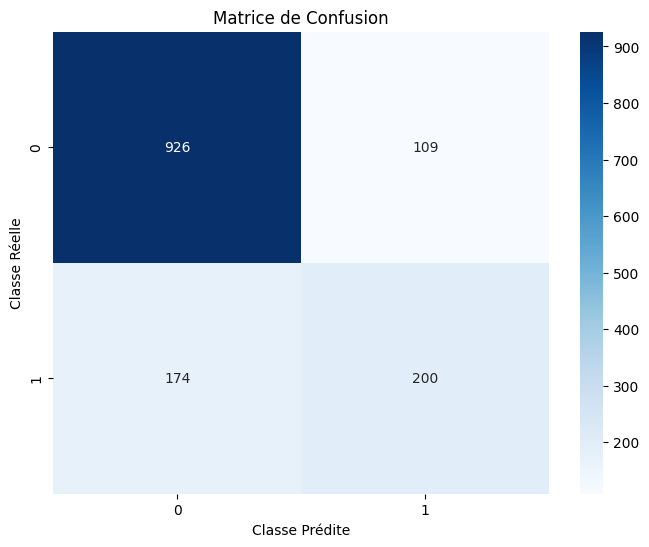


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matrice de Confusion")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()

# Optional: classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))